# **Tugas Web Mining**

Nama : Bihubbil Choir Aidifta<p>
NIM : 190411100121

## Web Mining

Web Mining adalah proses teknik Data Mining untuk secara otomatis menemukan dan mengekstrak informasi dari suatu halaman Web. Tujuan utama penambangan web adalah menemukan informasi yang berguna.

Penambangan web membantu meningkatkan kekuatan mesin pencari web dengan mengklasifikasikan dokumen web dan mengidentifikasi halaman web.


---

# **Tugas Mining Data Twitter Untuk Menganalisis Sentimen atau Opini Suatu Topik (klasifikasi menggunakan KNN)**

Twitter
Twitter adalah situs berita dan jejaring sosial online tempat orang berkomunikasi dalam pesan singkat yang disebut tweet. Tweeting adalah memposting pesan singkat untuk siapa saja yang mengikuti kita di Twitter, dengan harapan kata-kata kita dapat bermanfaat dan menarik bagi orang lain.

---

## **Instalasi Library**
Pada tahap ini dilakukan instalasi library-library yang nantinya dibutuhkan untuk menjalankan program, berikut adalah library yang dibutuhkan : 

---



> ##  Snscrape
Snscrape merupakan perpustakaan / library sumber terbuka (open source) yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan scraping atau ekstraksi dari jejaring sosial. Pada program ini kita akan menggunakan Snscrape untuk mengambil/mengekstrak data Tweets dari Twitter.

> ## Pandas
Pandas merupakan perpustakaan / library sumber terbuka (Open Source) yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan analisis dan manipulasi data, khususnya untuk memanipulasi tabel numerik dan deret waktu.
Pada program ini kita akan memanfaatkan Pandas DataFrame untuk menempatkan data hasil crawling.

> ## Sastrawi
Sastrawi merupakan perpustakaan / library sumber terbuka yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan pengurangan kata-kata yang ter- infleksi dalam bahasa Indonesia ke bentuk baku-nya atau sesuai dengan standar kamus.

> ## Scikit-learn
Scikit-learn adalah library machine learning open source  untuk bahasa pemrograman Python. Ini fitur berbagai klasifikasi, regresi, algoritma pengelompokan, dan alat yang efisien untuk data mining dan analisis data. Ini dibangun di atas NumPy, SciPy, dan Matplotlib.


In [1]:
%%capture
!pip install snscrape
!pip install pandas
!pip install Sastrawi
!pip install scikit-learn

## **Menulis Script Konfigurasi Snscrape**
Pada tahap ini akan dibuat script kofigurasi Snscrape, script ini sendiri berupa modul yang berisi fungsi-fungsi untuk melakukan crawling dan scraping data tweet yang berada pada Twitter.<p>
Berikut adalah penjelasan singkat mengenai script tersebut.

---
<br>

```
search_query = "Jokowi"
jumlah_tweets = 100
tweets = []
```

Variable tersebut merupakan variable yang berguna untuk mendefinisikan "search query" yang akan digunakan untuk mencari topik spesifik di twitter, "jumlah tweet" yang nantinya akan diambil, serta sebuah wadah berupa "list" yang nantinya akan digunakan untuk menyimpan data hasil scrape.

---

<br>

```
for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    
    if len(tweets) == jumlah_tweets:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content, 'None'])
```

Loop ini berfungsi untuk mengambil tiap data tweet yang berhasil diambil dari twitter berdasarkan query yang telah kita definisikan sebelumnya. Pada loop tersebut terdapat pengecekan kondisi yang akan mengecek jumlah tweet yang berhasil diambil, selama loop ini belum mencapai batas jumlah tweet yang kita tentukan sebelumnya, maka loop ini akan terus melakukan penambahan data tweet ke wadah(list) yang telah dibuat sebelumnya.


---

<br>

```
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Label'])
```
Variable diatas berfungsi untuk mendefinisikan data tweet yang sebelumnya telah ditempatkan di wadah(list), dalam bentuk Pandas Dataframe.





In [2]:

import snscrape.modules.twitter as sntwitter
import pandas as pd
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

search_query = "Jokowi"
jumlah_tweets = 100
tweets = []


for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    
    if len(tweets) == jumlah_tweets:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content, 'None'])
        
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Label'])
print(df)


                        Date             User  \
0  2022-11-08 16:33:45+00:00    ARausyanFikri   
1  2022-11-08 16:33:45+00:00       Adhi_Beka2   
2  2022-11-08 16:33:25+00:00      YoanAngelic   
3  2022-11-08 16:32:22+00:00  JohanIb60933475   
4  2022-11-08 16:32:17+00:00  BerhadiahPulpen   
..                       ...              ...   
95 2022-11-08 16:16:46+00:00        MohdYoga4   
96 2022-11-08 16:16:37+00:00  HaranaMardjihad   
97 2022-11-08 16:16:35+00:00           Dydydi   
98 2022-11-08 16:16:33+00:00      DsSupriyady   
99 2022-11-08 16:16:28+00:00      kun_gustavo   

                                                Tweet Label  
0   @setkabgoid @jokowi Iya, pokoknya jgn sampai k...  None  
1   @IchaStyan @detikcom @NasDem Ya lain lah drun....  None  
2   Dibohongi Pemerintahan Jokowi Sejak 2015, Pemi...  None  
3   @m_kamzi @alisyarief @jokowi Dinamika dalam po...  None  
4   @Muhammad_Saewad Ada yg demo modal gede minta ...  None  
..                                     

### Melakukan Pengecekan Berkas Hasil Scrape Lama

Karena setelah melakukan scraping data tweet kita perlu memberikan label secara manual, maka untuk menghindari berkas lama tertimpa oleh berkas baru, disini kita akan melakukan pengecekan berkas hasil scrape lama, apakah ada pada direktori atau tidak. Jika berkas hasil scrape lama tidak ditemukan pada direktori, maka hasil scrape sebelumnya (yang ada pada Pandas Dataframe) akan diespor menjadi berkas csv.

In [3]:
%%capture
import os
!wget https://raw.githubusercontent.com/smilesense/datasets/master/ppw/19_121_tweets_labeled.csv -O 19_121_tweets_labeled.csv


output_stream = os.popen('cat 19_121_tweets_labeled.csv')
res = output_stream.read()
if res == '':
  df.to_csv('19_121_tweets_labeled.csv')

### **Import Hasil**
Setelah perintah sebelumnya berhasil dijalankan, selanjutnya kita akan melakukan import isi berkas hasil scrape sebelumnya kedalam Pandas DataFrame.

In [4]:
import pandas as pd
# pd.options.mode.chained_assignment = None
# pd.options.display.max_colwidth = None
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None
df = pd.read_csv('19_121_tweets_labeled.csv', usecols=['User', 'Tweet', 'Label'])
df

,User,Tweet,Label
0,Truncvg,@jokowi Mentolo napuk cocot.e samean aku pak\r...,Negatif
1,WartaEkonomi,Achmad Nur Hidayat Ungkap Kemungkinan Kaitan P...,Negatif
2,okezonenews,Bjorka: Apa Anda (Jokowi) butuh bantuan saya u...,Negatif
3,infoBanyumas12,#Foto Presiden Jokowi mengakui kenaikan harga ...,Positif
4,Metdro2,@Yatie84991237 @_TNIAL_ @edhi_shi @JohnVirgoVj...,Negatif
...,...,...,...
76,bn_1c,President Jokowi is Committed to Resolving Hum...,Positif
77,adi27setiawan,"@jokowi Telek pak2, kekayaan indo hanya dinikm...",Negatif
78,AyahFerGie,@yosnggarang @jokowi Tiada hari tanpa omong ko...,Negatif
79,de_fatah,@JSuryoP1 Kasihan Pak Prabowo juga. Sudah rela...,Negatif


## **Preprocessing Data Tweets**

### Case Folding
Case folding merupakan tahap text preprocessing yang berguna untuk :


*   Mengubah huruf kapital menjadi huruf kecil
*   Mengapus tanda baca
*   Menghapus angka
*   Menghapus karakter kosong

<br>

Sebelum melakukan case folding diatas, kode ini juga melakukan penghapusan link dan mention yang ada pada data tweet.



In [5]:
import string

#Mengapus link dan mention
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)
indx = 0
for i in df['Tweet']:
  temp = df['Tweet'][indx].split()
  for j in temp:
    if 'http' in j:
      df['Tweet'] = df['Tweet'].replace(r'%s'%j," ", regex=True)
    if '@' in j:
      df['Tweet'] = df['Tweet'].replace(r'%s'%j," ", regex=True)
  indx+=1



#mengubah menjadi huruf kecil
df['Tweet'] = df['Tweet'].str.lower()

#menghapus tanda baca
for char in string.punctuation:
    df['Tweet'] = df['Tweet'].replace(r'[\%s]'%char," ", regex=True)

#menghapus angka
df['Tweet'] = df['Tweet'].replace(r'\d+',' ', regex=True)

#menghapus karakter kosong
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)
df['Tweet'][2]



'bjorka apa anda jokowi butuh bantuan saya untuk menyelesaikan masalah ini pak '

### Stopwords Removal
StopWords Removal merupakan tahap prepocessing yang berguna untuk menhapus kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll.


In [6]:
import urllib.request, json 
with urllib.request.urlopen("https://raw.githubusercontent.com/smilesense/stopwords-id/master/stopwords-id.json") as list_stopwords:
    data_stopword = json.load(list_stopwords)

for i in data_stopword:
    df['Tweet'] = df['Tweet'].replace(r'\b%s\b'%i, '', regex=True)
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)

df['Tweet'][2]

'bjorka jokowi butuh bantuan menyelesaikan '

### Stemming
Stemming merupakan tahapan dalam preprocessing yang berguna untuk mengubah kata yang memiliki imbuhan menjadi kata dasarnya. Contohnya adalah, misal pada suatu teks terdapat kata "berjalan", maka dengan menerapkan metode stemming, teks tersebut akan diubah menjadi kata "jalan" atau bentuk dasar dari kata "berjalan". 

In [7]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# stemming process

try:
  ind = 0
  for sentence in df['Tweet']:
      df['Tweet'][ind] = stemmer.stem(str(sentence))
      ind+=1
  raise KeyboardInterrupt
except KeyboardInterrupt:
  print(df['Tweet'][2])
else :
  print(df['Tweet'][2])


bjorka jokowi butuh bantu selesai


### Tokenisasi

Tokenizing adalah tahap preprocessing yang berguna untuk memisahkan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token.

In [8]:
indeks = 0
df2 = df.copy()
for tweet in df2['Tweet']:
    df2['Tweet'][indeks] = str(tweet).split()
    indeks+=1

df2['Tweet'][2]


['bjorka', 'jokowi', 'butuh', 'bantu', 'selesai']

### Hasil Preprocessing


In [9]:
df2

,User,Tweet,Label
0,Truncvg,"[mentolo, napuk, cocot, e, samean, ga, nduwe, ...",Negatif
1,WartaEkonomi,"[achmad, nur, hidayat, kait, lengser, suharso,...",Negatif
2,okezonenews,"[bjorka, jokowi, butuh, bantu, selesai]",Negatif
3,infoBanyumas12,"[foto, presiden, jokowi, aku, naik, harga, bbm...",Positif
4,Metdro2,"[iya, dluhuran]",Negatif
...,...,...,...
76,bn_1c,"[president, jokowi, is, committed, to, resolvi...",Positif
77,adi27setiawan,"[telek, kaya, indo, nikmat, gelintir, orang, y...",Negatif
78,AyahFerGie,"[tiada, omong, kosong, citra]",Negatif
79,de_fatah,"[kasihan, prabowo, rela, bantu, elu, elu, puji...",Negatif


## **Term Frequency (TF)**
Term Frequency merupakan metode yang digunakan untuk mengetahui seberapa sering suatu kata muncul dalam suatu teks. Semakin banyak frekuensi kemunculan dari kata tsb, semakin besar pula nanti nilainya.



### Term Frequency Keseluruhan

In [10]:
listkata = []
for tweet in df['Tweet']:
    listkata = listkata + str(tweet).split()

listkata_nodup = list(dict.fromkeys(listkata))
hasil_hitung = {}
for test1 in listkata_nodup:
    jumlah = 0
    for test2 in range(len(listkata)):
        if test1 == listkata[test2]:
            jumlah+=1
    hasil_hitung.update({'%s'%test1 : jumlah})
    
hasil_hitung = dict(sorted(hasil_hitung.items(), key=lambda item: item[1], reverse=True))
print(hasil_hitung)

{'jokowi': 37, 'yg': 27, 'presiden': 12, 'gak': 10, 'ga': 9, 'bangun': 9, 'bbm': 9, 'aja': 9, 'nya': 6, 'demo': 6, 'rakyat': 6, 'bjorka': 5, 'naik': 5, 'perintah': 5, 'orang': 5, 'subsidi': 5, 'tau': 5, 'negeri': 5, 'anies': 5, 'kaya': 5, 'bantu': 4, 'kerja': 4, 'jawa': 4, 'to': 4, 'negara': 4, 'ya': 4, 'data': 4, 'amp': 4, 'periode': 4, 'tambal': 4, 'harga': 3, 'biar': 3, 'hoax': 3, 'janji': 3, 'surplus': 3, 'apbn': 3, 'blt': 3, 'nama': 3, 'bendung': 3, 'of': 3, 'indonesia': 3, 'penuh': 3, 'dasar': 3, 'tuh': 3, 'kompeten': 3, 'demokrat': 3, 'ganti': 3, 'ekonomi': 3, 'pasang': 3, 'tuju': 3, 'percaya': 3, 'jabat': 3, 'dosa': 3, 'jis': 3, 'e': 2, 'samean': 2, 'foto': 2, 'pengaruh': 2, 'laju': 2, 'inflasi': 2, 'berita': 2, 'lanjut': 2, 'anak': 2, 'klo': 2, 'uang': 2, 'bagus': 2, 'aceh': 2, 'beli': 2, 'deh': 2, 'raja': 2, 'ngibul': 2, 'klemer': 2, 'jakarta': 2, 'ambassador': 2, 'president': 2, 'in': 2, 's': 2, 'suara': 2, 'adlh': 2, 'tuhan': 2, 'mundur': 2, 'usaha': 2, 'rintis': 2, 'bin': 

### Term Frequency Tiap Tweet

In [11]:
def terms(dataframe):
  # pd.options.mode.chained_assignment = None
  # pd.options.display.max_colwidth = None
  # pd.options.display.max_columns = None
  # pd.options.display.max_rows = None

  df3 = dataframe.copy()
  a = 1
  for inter in range(len(df3['Tweet'])):
      for fitur in hasil_hitung:
          df3['%s'%(fitur)] = 0
          a+=1

  for inter in range(len(df3['Tweet'])):
    for fitur in hasil_hitung:
        cek = df3['Tweet'][inter]
        jumlah = 0
        for iter2 in range(len(cek)):
          if fitur == cek[iter2]:
            jumlah+=1
        df3['%s'%fitur][inter] = jumlah
        a+=1
  df3.to_csv(r'my_data.csv', index=False)
  return df3
terms(df2)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,User,Tweet,Label,jokowi,yg,presiden,gak,ga,bangun,bbm,...,citra,kasihan,prabowo,rela,puji,muji,jilat,pssi,pantes,suram
0,Truncvg,"[mentolo, napuk, cocot, e, samean, ga, nduwe, ...",Negatif,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,WartaEkonomi,"[achmad, nur, hidayat, kait, lengser, suharso,...",Negatif,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,okezonenews,"[bjorka, jokowi, butuh, bantu, selesai]",Negatif,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,infoBanyumas12,"[foto, presiden, jokowi, aku, naik, harga, bbm...",Positif,2,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Metdro2,"[iya, dluhuran]",Negatif,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,bn_1c,"[president, jokowi, is, committed, to, resolvi...",Positif,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,adi27setiawan,"[telek, kaya, indo, nikmat, gelintir, orang, y...",Negatif,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,AyahFerGie,"[tiada, omong, kosong, citra]",Negatif,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
79,de_fatah,"[kasihan, prabowo, rela, bantu, elu, elu, puji...",Negatif,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,0,0,0


## **Seleksi Fitur Menggunakan Information Gain (Mutual Information)**

Information Gain Merupakan metode yang digunakan untuk mengukur seberapa penting / berpengaruh sebuah fitur terhadap hasil pengukuran. Penggunaan teknik ini dapat mereduksi dimensi fitur dengan cara mengukur reduksi Entropy sebelum dan sesudah pemisahan. Metode ini juga dikenal dengan sebutan Mutual Information, biasanya digunakan untuk mengetahui dependency antara dua variable "x" dan "y".


### Melakukan Training 
Training disini berfungsi untuk menghindari overfitting, yaitu keadaan dimana suatu model berusaha untuk mempelajari seluruh detail dalam data.

In [12]:
df4 = pd.read_csv('my_data.csv')
df4['Label'].unique()

array(['Negatif', 'Positif'], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df4.drop(labels=['Label', 'User', 'Tweet'], axis=1),
    df4['Label'],
    test_size=0.3,
    random_state=0)
y_train

43    Negatif
4     Negatif
72    Negatif
17    Negatif
63    Negatif
8     Negatif
6     Negatif
59    Positif
38    Negatif
56    Negatif
34    Negatif
28    Positif
11    Negatif
54    Negatif
23    Negatif
10    Positif
31    Negatif
45    Negatif
78    Negatif
1     Negatif
32    Negatif
68    Negatif
14    Negatif
52    Negatif
19    Negatif
29    Negatif
60    Negatif
49    Negatif
24    Negatif
35    Negatif
18    Negatif
0     Negatif
79    Negatif
15    Positif
5     Negatif
62    Negatif
16    Positif
51    Positif
20    Positif
75    Negatif
25    Negatif
37    Negatif
46    Negatif
39    Negatif
65    Negatif
58    Negatif
12    Negatif
70    Positif
36    Negatif
21    Negatif
9     Negatif
77    Negatif
67    Positif
64    Negatif
47    Negatif
44    Negatif
Name: Label, dtype: object

### Melakukan seleksi Fitur
Setelah melakukan training untuk menghindari overfitting, selanjutnya data hasil training tersebut akan dilakukan feature selection menggunakan metode mutual information classification

In [14]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([1.81058728e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.87514097e-02, 8.29110445e-02, 7.06894076e-03,
       5.59777979e-02, 6.48705419e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.41140377e-02, 0.00000000e+00,
       1.33375291e-02, 5.32136424e-02, 7.85392204e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.47738680e-02, 0.00000000e+00,
       7.21718156e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.63598691e-02, 2.90381146e-02, 2.06338990e-02, 2.84466210e-02,
       0.00000000e+00, 6.61535370e-02, 0.00000000e+00, 0.00000000e+00,
       4.08162683e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.09623020e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.47370009e-01, 1.86561084e-02,
       0.00000000e+00, 7.80818198e-03, 0.00000000e+00, 8.13921779e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.14397659e-01,
      

### Melakukan Ranking Fitur
Setelah selesai melakukan seleksi fitur, pada tahap ini kita akan meranking fitur tersebut berdasarkan tingkatan information gain (mutual information) yang dimiliki.

In [15]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
tetdf = pd.DataFrame(mutual_info)
tetdf

,0
jokowi,0.181059
yg,0.000000
presiden,0.000000
gak,0.000000
ga,0.000000
...,...
muji,0.000000
jilat,0.000000
pssi,0.035740
pantes,0.024908


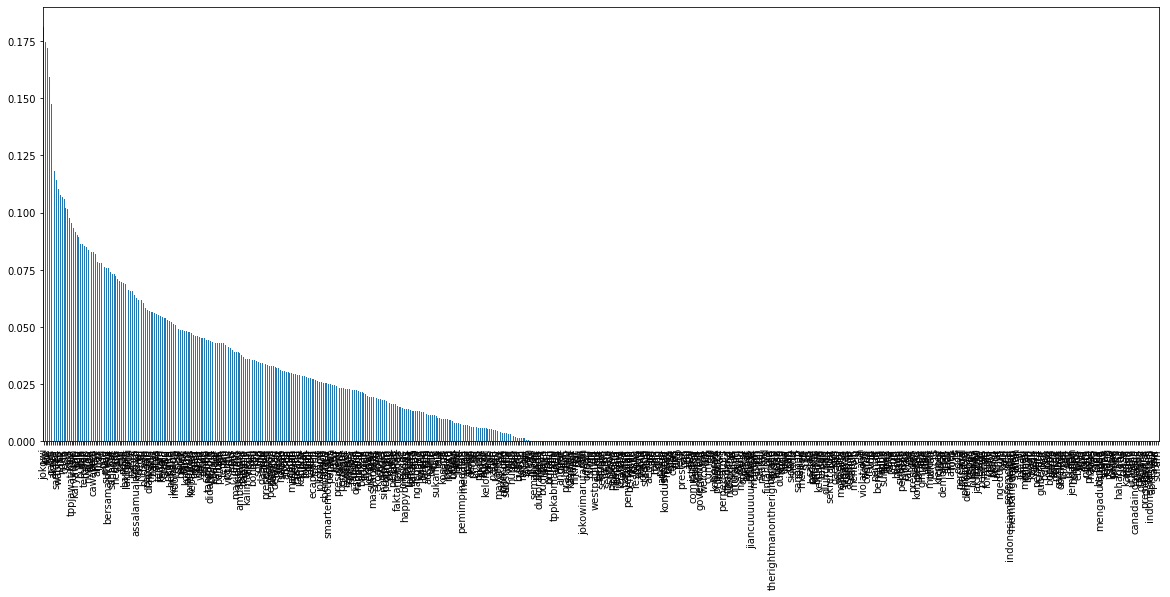

In [16]:
#llet's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [17]:
from sklearn.feature_selection import SelectKBest

sel_best = SelectKBest(mutual_info_classif, k=50)
sel_best.fit(X_train, y_train)
X_train.columns[sel_best.get_support()]

Index(['jokowi', 'bangun', 'demo', 'subsidi', 'data', 'kompeten', 'ganti',
       'tuju', 'samean', 'lanjut', 'in', 'rintis', 'paham', 'masyarakat',
       'sah', 'human', 'violations', 'pers', 'bang', 'bangsa', 'jam', 'kagak',
       'kt', 'useless', 'diawasin', 'medsos', 'laknat', 'bener', 'sedap',
       'ricuh', 'ngomong', 'minimal', 'korupsi', 'hehehe', 'tpp', 'khas',
       'tani', 'pangan', 'kaburrr', 'harto', 'mggu', 'bengkak', 'penyesuian',
       'emang', 'rusak', 'dngan', 'ancam', 'prioritize', 'gelintir', 'jauhhh'],
      dtype='object')

## **Klasifikasi sentimen menggunakan metode [KNN]** 
k-nearest neighbor (KNN) adalah algoritma pembelajaran mesin terawasi yang sederhana dan mudah diterapkan yang dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Berhenti sebentar! Mari kita membongkar itu.

pembelajaran mesin terawasi sendiri merupakan algoritma yang bergantung pada data input berlabel untuk mempelajari fungsi yang menghasilkan output yang sesuai ketika diberikan data baru yang tidak berlabel.


### Melakukan Training 
Training disini berfungsi untuk menghindari overfitting, yaitu keadaan dimana suatu model berusaha untuk mempelajari seluruh detail dalam data.

In [18]:
df4 = pd.read_csv('my_data.csv')
df4['Label'].unique()

array(['Negatif', 'Positif'], dtype=object)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df4.drop(labels=['Label', 'User', 'Tweet'], axis=1),
    df4['Label'],
    test_size=0.3,
    random_state=0)
y_train

43    Negatif
4     Negatif
72    Negatif
17    Negatif
63    Negatif
8     Negatif
6     Negatif
59    Positif
38    Negatif
56    Negatif
34    Negatif
28    Positif
11    Negatif
54    Negatif
23    Negatif
10    Positif
31    Negatif
45    Negatif
78    Negatif
1     Negatif
32    Negatif
68    Negatif
14    Negatif
52    Negatif
19    Negatif
29    Negatif
60    Negatif
49    Negatif
24    Negatif
35    Negatif
18    Negatif
0     Negatif
79    Negatif
15    Positif
5     Negatif
62    Negatif
16    Positif
51    Positif
20    Positif
75    Negatif
25    Negatif
37    Negatif
46    Negatif
39    Negatif
65    Negatif
58    Negatif
12    Negatif
70    Positif
36    Negatif
21    Negatif
9     Negatif
77    Negatif
67    Positif
64    Negatif
47    Negatif
44    Negatif
Name: Label, dtype: object

In [20]:
from sklearn.neighbors import KNeighborsClassifier
list_y_pred = []
for i in range(2,len(y_train)):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  list_y_pred2 = [i, y_pred] 
  list_y_pred.append(list_y_pred2)
list_y_pred

[[2, array(['Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif', 'Negatif', 'Positif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif', 'Positif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif'], dtype=object)],
 [3, array(['Negatif', 'Negatif', 'Negatif', 'Positif', 'Positif', 'Negatif',
         'Positif', 'Negatif', 'Negatif', 'Positif', 'Negatif', 'Negatif',
         'Negatif', 'Negatif', 'Positif', 'Positif', 'Positif', 'Negatif',
         'Negatif', 'Positif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif'], dtype=object)],
 [4, array(['Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif', 'Negatif',
         'Negatif

### Melakukan Pengecekan tingkat akurasi KNN dengan parameter jumlah Nearest Neighbors yang berbeda.

Pengecekan tingkat akurasi dari tiap "parameter jumlah Nearest Neighbors" yang berbeda ini berguna untuk dapat mengetahui berapa "jumlah Nearest Neighbors" yang memiliki akurasi paling tinggi.

In [21]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score

list_akurasi = []
for i in range(len(list_y_pred)):
  # print(list_pred[i])
  # testing = neigh.predict(X_test) 
  accuracy_neigh=round(accuracy_score(y_test,list_y_pred[i][1])* 100, 2)
  acc_neigh = round(neigh.score(X_train, y_train) * 100, 2)
  list_akurasi2 = [list_y_pred[i][0], accuracy_neigh]
  list_akurasi.append(list_akurasi2)
# list_akurasi

#### Tampilan table tingkat akurasi KNN dengan perbedaan parameter jumlah Nearest Neighbors

In [22]:
df5 = pd.DataFrame(list_akurasi, columns=["Nearest Neighbors","Akurasi"])
df5

,Nearest Neighbors,Akurasi
0,2,76.0
1,3,68.0
2,4,68.0
3,5,68.0
4,6,68.0
5,7,68.0
6,8,68.0
7,9,68.0
8,10,68.0
9,11,68.0


#### Tampilan grafik tingkat akurasi KNN dengan perbedaan parameter jumlah Nearest Neighbors.

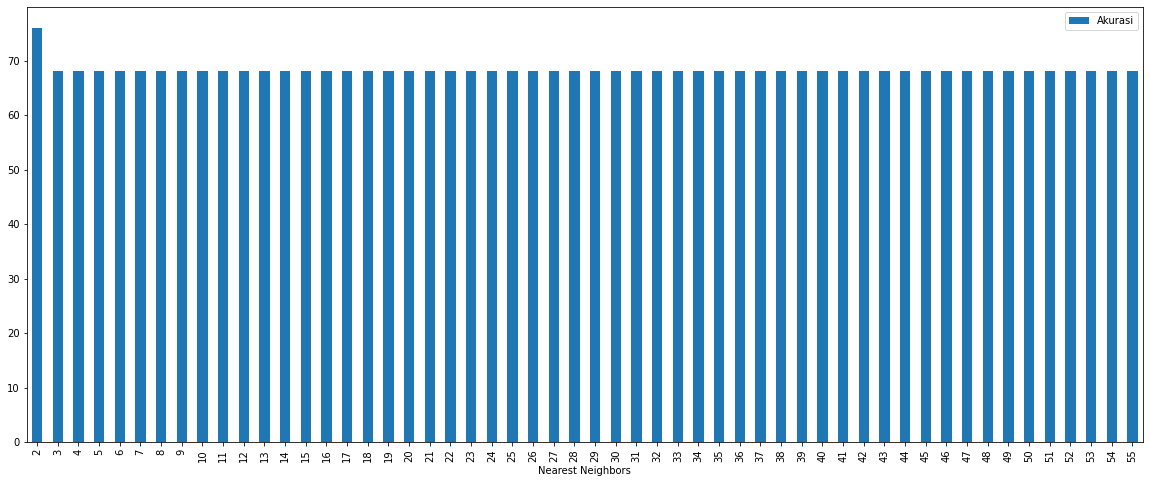

In [23]:
df5.plot.bar(x='Nearest Neighbors',y='Akurasi',figsize=(20, 8))

# **Klasifikasi sentimen menggunakan Metode Ensemble Learning**

### Melakukan Training 
Training disini berfungsi untuk menghindari overfitting, yaitu keadaan dimana suatu model berusaha untuk mempelajari seluruh detail dalam data.

In [24]:
df4 = pd.read_csv('my_data.csv')
df4['Label'].unique()

array(['Negatif', 'Positif'], dtype=object)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df4.drop(labels=['Label', 'User', 'Tweet'], axis=1),
    df4['Label'],
    test_size=0.3,
    random_state=0)
y_train

43    Negatif
4     Negatif
72    Negatif
17    Negatif
63    Negatif
8     Negatif
6     Negatif
59    Positif
38    Negatif
56    Negatif
34    Negatif
28    Positif
11    Negatif
54    Negatif
23    Negatif
10    Positif
31    Negatif
45    Negatif
78    Negatif
1     Negatif
32    Negatif
68    Negatif
14    Negatif
52    Negatif
19    Negatif
29    Negatif
60    Negatif
49    Negatif
24    Negatif
35    Negatif
18    Negatif
0     Negatif
79    Negatif
15    Positif
5     Negatif
62    Negatif
16    Positif
51    Positif
20    Positif
75    Negatif
25    Negatif
37    Negatif
46    Negatif
39    Negatif
65    Negatif
58    Negatif
12    Negatif
70    Positif
36    Negatif
21    Negatif
9     Negatif
77    Negatif
67    Positif
64    Negatif
47    Negatif
44    Negatif
Name: Label, dtype: object

## Bagging CLassifier

Pengklasifikasi Bagging adalah meta-estimator ensemble yang cocok dengan pengklasifikasi dasar masing-masing pada subset acak dari dataset asli dan kemudian menggabungkan prediksi individu mereka (baik dengan pemungutan suara atau rata-rata) untuk membentuk prediksi akhir. Meta-estimator seperti itu biasanya dapat digunakan sebagai cara untuk mengurangi varians dari estimator kotak hitam (misalnya, pohon keputusan), dengan memasukkan pengacakan ke dalam prosedur konstruksinya dan kemudian membuat ansambel darinya.

In [26]:
X = df4.drop(labels=['Label', 'User', 'Tweet'], axis=1)
y = df4['Label']

In [27]:
from sklearn import model_selection

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

kfold = model_selection.KFold(n_splits = 3,
                       random_state = 5, shuffle=True)

X, y = make_classification(n_samples=100, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=True)
clf = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=5).fit(X, y)
clf.predict([[0, 0, 0, 0]])

results = model_selection.cross_val_score(clf, X, y, cv = kfold)
print("accuracy :")
# print(results.mean())
clf.score(X, y, sample_weight=None)

accuracy :


0.91

## Random Forest

Random Forest adalah algoritma pembelajaran mesin populer yang termasuk dalam teknik pembelajaran terawasi. Ini dapat digunakan untuk masalah Klasifikasi dan Regresi di ML. Hal ini didasarkan pada konsep ensemble learning, yang merupakan proses menggabungkan beberapa pengklasifikasi untuk memecahkan masalah yang kompleks dan untuk meningkatkan kinerja model.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=True)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
# RandomForestClassifier(...)
# print(clf.predict([[0, 0, 0, 0]]))
print("accuracy :")
clf.score(X, y, sample_weight=None)

accuracy :


0.948

# **Clustering sentimen menggunakan metode [KMEANS]**

Clustering, secara umum, adalah metode "belajar tanpa pengawasan". Itu berarti kita tidak memiliki variabel target.

K-means clustering merupakan yang paling umum digunakan untuk mempartisi kumpulan data yang diberikan ke dalam kumpulan k grup (yaitu k cluster ), di mana k mewakili jumlah grup yang ditentukan sebelumnya oleh analis .


### Reduksi dimensi menggunakan metode [Principal Component Analysis(PCA)]

Principal Component Analysis(PCA) merupakan metode yang berfungsi untuk mengubah data berdimensi tinggi menjadi data berdimensi rendah dengan memilih fitur terpenting yang menangkap informasi maksimum tentang kumpulan data. Fitur dipilih berdasarkan varians yang ditimbulkannya dalam output. Fitur yang menyebabkan varians tertinggi adalah komponen utama pertama. Fitur yang bertanggung jawab untuk varian tertinggi kedua dianggap sebagai komponen utama kedua, dan seterusnya.

In [29]:
from sklearn.decomposition import PCA
df_fcluster = df4.drop(labels=['Label', 'User', 'Tweet'], axis=1)
# df_fcluster
pca = PCA(n_components=2)
df_fcluster = pca.fit_transform(df_fcluster)
df_fclusters = pd.DataFrame(df_fcluster)
df_fclusters

,0,1
0,-0.554378,-0.012442
1,-0.076428,-0.653198
2,-0.102024,-0.526432
3,1.579420,-1.686848
4,-0.515436,0.075356
...,...,...
76,-0.437557,-1.722077
77,0.581919,0.988800
78,-0.529314,0.078299
79,-0.149573,-0.572495


### Hasil Clustering

In [30]:
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=2)
kmeans=kmeans.fit(df_fcluster)
prediksi=kmeans.predict(df_fcluster)
centroids = kmeans.cluster_centers_

dfprediksi = pd.DataFrame(prediksi, columns=["Cluster"])
# dfcentroids = pd.DataFrame(centroids)
# hasil = dfcentroids.merge(dfprediksi,left_index=True, right_on='Cluster')
# pd.options.display.max_rows = None
dfprediksi


,Cluster
0,0
1,0
2,0
3,1
4,0
...,...
76,0
77,0
78,0
79,0


# **Tugas Meringkas Dokumen**

Meringkas merupakan proses untuk mempersingkat suatu dokumen atau teks dengan cara mengambil beberapa bagian penting saja yang berada pada teks, sehingga teks tersebut dapat dengan mudah dan lebih cepat untuk dipahami.

Pada kesempatan kali ini, disini kita akan mencoba untuk meringkas suatu artikel pada laman media berita terkemuka, yaitu kompas.com 

**Metode**

Untuk pengaplikasiannya, disini kita akan mencoba menerapkan metode atau algoritma pagerank.

PageRank (PR) adalah algoritma yang digunakan oleh Google Search untuk menentukan peringkat situs web dalam hasil mesin pencari mereka. 

**PageRank** bekerja dengan menghitung jumlah dan kualitas tautan ke halaman untuk menentukan perkiraan kasar tentang seberapa penting situs web itu. Asumsi yang mendasarinya adalah bahwa situs web yang lebih penting cenderung menerima lebih banyak tautan dari situs web lain.

Namun karena disini kita akan menerapkannya untuk meranking kalimat (bukan halaman), maka disini kita akan meyebut algoritma tersebut sebagai **textrank**.

Berikut adalah tahapan yang akan kita lakukan dalam penerapan textrank untuk meranking kalimat.

![tahapan meringkas](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/10/block_3.png)

[sumber foto](https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/)

## **Instalasi Library**
Pada tahap ini dilakukan instalasi library-library yang nantinya dibutuhkan untuk menjalankan program, berikut adalah library yang dibutuhkan : 

---



> ##  [Scrapy](https://scrapy.org/)
Scrapy merupakan kerangka kerja / framework sumber terbuka (open source) yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan ekstraksi data dari suatu web. Pada program ini kita akan menggunakan scrapy untuk mengambil/mengekstrak data abstrak dari website Portal Tugas Akhir Universitas Trunojoyo Madura.

> ## [Pandas](https://pandas.pydata.org/)
Pandas merupakan perpustakaan / library sumber terbuka (Open Source) yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan analisis dan manipulasi data, khususnya untuk memanipulasi tabel numerik dan deret waktu.
Pada program ini kita akan memanfaatkan Pandas DataFrame untuk menempatkan data hasil crawling.

> ## [Scikit-learn](https://scikit-learn.org/stable/index.html)
Scikit-learn adalah library machine learning open source  untuk bahasa pemrograman Python. Ini fitur berbagai klasifikasi, regresi, algoritma pengelompokan, dan alat yang efisien untuk data mining dan analisis data. Ini dibangun di atas NumPy, SciPy, dan Matplotlib.

> ## [Natural Language Toolkit](https://www.nltk.org/index.html) (NTLK)
NLTK adalah platform terkemuka untuk membangun program Python untuk bekerja dengan data bahasa manusia. Ini menyediakan antarmuka yang mudah digunakan ke lebih dari 50 sumber daya korpora dan leksikal seperti WordNet, bersama dengan rangkaian perpustakaan pemrosesan teks untuk klasifikasi, tokenisasi, stemming, penandaan, penguraian, dan penalaran semantik, pembungkus untuk perpustakaan NLP kekuatan industri, dan forum diskusi yang aktif . [Sumber](https://www.nltk.org/index.html)


> ## [SciPy](https://docs.scipy.org/doc/scipy/tutorial/general.html) (NTLK)
SciPy adalah kumpulan algoritma matematika dan fungsi kenyamanan yang dibangun di atas ekstensi NumPy dari Python. Ini menambahkan kekuatan yang signifikan ke sesi Python interaktif dengan menyediakan pengguna dengan perintah dan kelas tingkat tinggi untuk memanipulasi dan memvisualisasikan data. [Sumber](https://docs.scipy.org/doc/scipy/tutorial/general.html)

In [31]:
%%capture
!pip install scrapy
!pip install pandas
!pip install scikit-learn
!pip install --user -U nltk

!pip install scipy
!pip install networkx


## **Menghapus File lama**
Karena disini kita akan menulis script dan mengekspor hasil ekstrak data ke sebuah berkas, maka untuk menghindari terjadinya duplikasi konten pada berkas tersebut, kita akan melakukan penghapusan berkas tersebut terlebih dahulu (jika berkas terebut ada)

In [32]:
!rm -rf kompas_scrape.py hasil.json && sleep 1

## **Menulis Script Konfigurasi Scrapy**
Pada tahap ini akan dibuat script kofigurasi scrapy, script ini sendiri berupa class yang berisi fungsi untuk melakukan crawling dan scraping data artikel yang berada pada website kompas.com.<p>
Berikut adalah penjelasan singkat mengenai script tersebut.

---
<br>

```
 start_urls = [
      artikel_url
      ]
```

Variable tersebut merupakan variable yang berisi url artikel yang nantinya akan di crawl oleh scrapy. Sebagai informasi, value yang berada pada variable tersebut merupakan url halaman artikel dari website kompas.com.

---


```
def parse(self, response):
        a = ""
        for paragraf in response.xpath('//div[contains(@class,"clearfix")]/p/text()').getall():
          a = a+" "+str(paragraf)
        item = {
            'judul' : response.xpath('//h1[contains(@class,"read__title")]/text()').get(),
            'konten' : a
        }

        yield item
```

Fungsi ini merupakan fungsi parsing konten yang berguna untuk melakukan parsing/penguraian dari dari url inputan guna untuk mendapatkan konten berupa teks (judul dan abstrak) dari suatu halaman tugas akhir.





In [33]:
%%writefile -a kompas_scrape.py
import string
import scrapy
from scrapy import Request

#@markdown ---
#@markdown ### Masukkan url artikel kompas.com :
artikel_url = "https://tekno.kompas.com/read/2022/10/06/16090047/gandeng-nicholas-saputra-di-film-terbarunya-riri-riza-beberkan-pengalaman-bikin" #@param {type:"string"}
artikel_url = artikel_url+"?page=all"
#@markdown ---

class ptaUTM(scrapy.Spider):
    name = "Kompas"
    start_urls = [
      artikel_url
      ]


    def parse(self, response):
        a = ""
        for paragraf in response.xpath('//div[contains(@class,"clearfix")]/p/text()').getall():
          a = a+" "+str(paragraf)
        item = {
            'judul' : response.xpath('//h1[contains(@class,"read__title")]/text()').get(),
            'konten' : a
        }

        yield item

Writing kompas_scrape.py


## **Menjalankan Script Scrapy**
Setelah sebelumnya kita menulis script konfigurasi scrapy, selanjutnya kita akan menjalankan script tersebut dengan perintah "scrapy runspider" yang diikuti dengan nama berkas script dan dan nama berkas output untuk menyimpan hasilnya.

In [34]:
%%capture
!scrapy runspider kompas_scrape.py -O hasil.json && sleep 2

## **Import Hasil**
Setelah perintah sebelumnya berhasil dijalankan, selanjutnya kita akan melakukan import isi berkas hasil scrape sebelumnya kedalam Pandas DataFrame.

In [35]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_scrape = pd.read_json('hasil.json')
df_scrape

judul  \
0  Gandeng Nicholas Saputra di Film Terbarunya, Riri Riza Beberkan Pengalaman Bikin Film Pakai Oppo Find X5 Pro 5G   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Preprocessing

## **Preprocessing**



### Split text/dokumen menjadi kalimat
Karena untuk meringkas text/dokumen disini kita akan membandingkan tiap kalimat, maka tiap kalimat yang ada pada dokumen akan pemisahan per kalimat.

In [36]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

df_pisahkalimat = df_scrape.copy()
df_pisahkalimat ["konten"][0] = sent_tokenize(df_pisahkalimat["konten"][0])

df_pisahkalimat = pd.DataFrame(df_pisahkalimat["konten"][0], columns=["kalimat"])
df_pisahkalimat

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,kalimat
0,"– Sineas serta produser kenamaan Indonesia, Riri Riza dan Mira Lesmana, meluncurkan terbaru berjudul pada Kamis (6/10/2022)."
1,Kedua sineas yang tergabung dalam Miles Film itu menggandeng Nicholas Saputra sebagai aktor utama di film yang berdurasi 30 menit tersebut.
2,"Untuk diketahui, kerja sama Nicholas, Riri, dan Mira sudah terjalin sejak lama."
3,"Nicholas telah terlibat dalam sejumlah film yang digarap Riri sebagai sutradara dan diproduseri Mira, yakni (2004), (2005), (2008), dan (2016)."
4,Film-film tersebut mendapat sambutan positif dari penikmat film Tanah Air.
5,", misalnya, berhasil ditonton 3,6 juta orang dalam kurun waktu satu bulan sejak diluncurkan pertama kali pada Kamis (28/4/2016)."
6,Film ini merajai Indonesia saat itu.
7,"Tentang film terbarunya, Riri mengatakan, mengisahkan tentang seorang penulis bernama Rhun (diperankan Nicholas) yang jatuh cinta dengan salah satu pembaca novel buatannya."
8,Keterpikatan Rhun terhadap orang tersebut membawanya dalam misteri tak terduga.
9,"Selain dari jalan cerita, beber Riri, film pendek tersebut punya keunikan lain, yakni direkam secara keseluruhan menggunakan , yakni ."


### Case Folding
Case folding merupakan tahap text preprocessing yang berguna untuk :


*   Mengubah huruf kapital menjadi huruf kecil
*   Mengapus tanda baca
*   Menghapus angka
*   Menghapus karakter kosong




In [37]:
import string
df_casefolding = df_pisahkalimat.copy()
#mengubah menjadi huruf kecil
df_casefolding['kalimat'] = df_casefolding['kalimat'].str.lower()

#menghapus tanda baca
tanda_baca = string.punctuation
tanda_baca = tanda_baca+"–"
for char in tanda_baca:
    df_casefolding['kalimat'] = df_casefolding['kalimat'].replace(r'[\%s]'%char," ", regex=True)

#menghapus angka
df_casefolding['kalimat'] = df_casefolding['kalimat'].replace(r'\d+',' ', regex=True)

#menghapus karakter kosong
df_casefolding['kalimat'] = df_casefolding['kalimat'].replace(r'\s+',' ', regex=True)
df_casefolding.head(2)

,kalimat
0,sineas serta produser kenamaan indonesia riri riza dan mira lesmana meluncurkan terbaru berjudul pada kamis
1,kedua sineas yang tergabung dalam miles film itu menggandeng nicholas saputra sebagai aktor utama di film yang berdurasi menit tersebut


### Stopwords Removal
StopWords Removal merupakan tahap prepocessing yang berguna untuk menhapus kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll.


In [38]:
import urllib.request, json
df_stopwords = df_casefolding.copy() 
with urllib.request.urlopen("https://raw.githubusercontent.com/smilesense/stopwords-id/master/stopwords-id.json") as list_stopwords:
    data_stopword = json.load(list_stopwords)

for i in data_stopword:
    df_stopwords['kalimat'] = df_stopwords['kalimat'].replace(r'\b%s\b'%i, '', regex=True)
df_stopwords['kalimat'] = df_stopwords['kalimat'].replace(r'\s+',' ', regex=True)

df_stopwords.head(2)

,kalimat
0,sineas produser kenamaan indonesia riri riza mira lesmana meluncurkan terbaru berjudul kamis
1,sineas tergabung miles film menggandeng nicholas saputra aktor utama film berdurasi menit


### Vectorization

Dalam Machine Learning, vektorisasi adalah langkah dalam ekstraksi fitur. Idenya adalah untuk mendapatkan beberapa fitur berbeda dari teks untuk model untuk dilatih, dengan mengubah teks menjadi vektor numerik.



In [39]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_matrix = cv.fit_transform(df_casefolding['kalimat'])

In [40]:
print ("Banyaknya kosa kata = ", len((cv.get_feature_names_out())))

Banyaknya kosa kata =  325


In [41]:
print ("kosa kata = ", (cv.get_feature_names_out()))

kosa kata =  ['agar' 'ainr' 'air' 'akan' 'aktor' 'akurasi' 'angkat' 'ataupun' 'bagian'
 'baik' 'bangga' 'banyak' 'batas' 'beber' 'bentuk' 'beragam' 'berbagai'
 'berbahan' 'bercerita' 'berdiskusi' 'berdurasi' 'beresolusi' 'berharap'
 'berhasil' 'berjudul' 'berkat' 'berkolaborasi' 'berkualitas' 'bernama'
 'bisa' 'buatannya' 'bujet' 'bulan' 'cahaya' 'camera' 'cerita' 'ch'
 'chief' 'cinta' 'citra' 'com' 'cukup' 'dalam' 'dan' 'dapat' 'dapatkan'
 'dari' 'demikian' 'dengan' 'depan' 'detail' 'di' 'diangkat' 'didesain'
 'didukung' 'digarap' 'dihadirkan' 'dihasilkan' 'dikembangkan' 'diketahui'
 'dilakukan' 'diluncurkan' 'dimaksimalkan' 'dinamis' 'diperankan'
 'diproduseri' 'dirancang' 'direkam' 'dirinya' 'disaksikan' 'ditambah'
 'ditonton' 'dnr' 'dual' 'dukungan' 'emosi' 'film' 'find' 'flagship'
 'gambar' 'gambarnya' 'gelap' 'genre' 'gerakan' 'hal' 'harus' 'hasil'
 'hasilnya' 'hingga' 'ia' 'ide' 'ikut' 'imx' 'indonesia' 'industri'
 'informasi' 'ini' 'inovasi' 'insight' 'itu' 'jalan' 'jatuh' 'jug

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())
print(normal_matrix.T.toarray)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.25561578 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.33740317]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
<bound method _cs_matrix.toarray of <325x44 sparse matrix of type '<class 'numpy.float64'>'
	with 596 stored elements in Compressed Sparse Column format>>


### Cosine Similarity

Cosinus Similarity ukuran kemiripan antara dua vektor bukan nol dari ruang hasil kali dalam. Pengukuran kesamaan ini terutama berkaitan dengan orientasi, bukan besarnya. Singkatnya, dua vektor kosinus yang sejajar dalam orientasi yang sama akan memiliki pengukuran kesamaan 1, sedangkan dua vektor yang sejajar tegak lurus akan memiliki kesamaan 0. 


---


Pengukuran Cosinus Similarity dimulai dengan mencari cosinus dari dua vektor bukan nol. Ini dapat diturunkan menggunakan rumus produk titik Euclidean yang ditulis sebagai:

${\displaystyle \mathbf {A} \cdot \mathbf {B} =\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|\cos \theta }$


---


Kemudian, mengingat dua vektor dan produk titik, kesamaan kosinus didefinisikan sebagai:

${\displaystyle {\text{cosine similarity}}=S_{C}(A,B)={\mathbf {A} \cdot \mathbf {B}  \over \|\mathbf {A} \|\|\mathbf {B} \|}={\frac {\sum \limits _{i=1}^{n}{A_{i}B_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{A_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{B_{i}^{2}}}}}},}$


---



In [43]:
import numpy as np
vektorkalimat=normal_matrix.toarray()
A=vektorkalimat[0]
B=vektorkalimat[1]
dot = np.dot(A, B)
norma = np.linalg.norm(A)
normb = np.linalg.norm(A)
cos = dot / (norma * normb)
cos

0.05455090845645886

## Membangun Graph

Graph merupakan sekumpulan objek terstruktur di mana beberapa pasangan objek mempunyai hubungan ataupun keterkaitan tertentu. Graph disini digunakan untuk melihat seberapa banyak hubungan antara kalimat satu dengan lainnya.

In [44]:
res_graph = normal_matrix * normal_matrix.T
print(res_graph)

  (0, 43)	0.037964866367060646
  (0, 40)	0.02830652734103744
  (0, 34)	0.02458680775193757
  (0, 33)	0.03021820466347394
  (0, 6)	0.09290535458379356
  (0, 41)	0.12945659798845793
  (0, 24)	0.04026122899565502
  (0, 35)	0.05737839681730318
  (0, 32)	0.053641878916212346
  (0, 31)	0.034952886076106006
  (0, 22)	0.07307406369813813
  (0, 19)	0.038469326035436804
  (0, 5)	0.08696919119164015
  (0, 23)	0.021285574992012214
  (0, 17)	0.04993068364432622
  (0, 16)	0.030399597561910588
  (0, 12)	0.07213543259870259
  (0, 10)	0.03595262469287051
  (0, 9)	0.02420172986029702
  (0, 7)	0.021729846834167503
  (0, 3)	0.13914258847920313
  (0, 2)	0.11906127768628352
  (0, 29)	0.1468478003874537
  (0, 28)	0.10061464753630059
  (0, 1)	0.05455090845645886
  :	:
  (42, 9)	0.03747150239037005
  (42, 7)	0.033644289573063174
  (42, 6)	0.07585465719190945
  (42, 4)	0.14882619103994477
  (42, 3)	0.04452102920762233
  (42, 1)	0.07783484618118466
  (42, 41)	0.22330422950350953
  (42, 42)	1.0
  (42, 32)	0.06779

In [45]:
import networkx as nx
nx_graph = nx.from_scipy_sparse_matrix(res_graph)

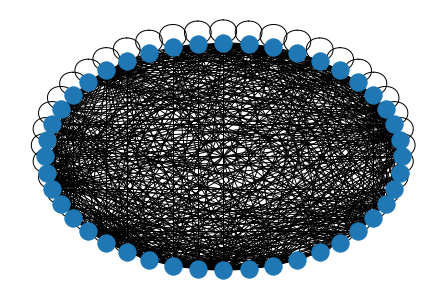

In [46]:
nx.draw_circular(nx_graph)

## Pagerank

PageRank adalah algoritma analisis tautan dan memberikan bobot numerik untuk setiap elemen dari kumpulan dokumen yang ditautkan. 

Perhitungan PageRank memerlukan beberapa lintasan, yang disebut "iterasi", melalui koleksi untuk menyesuaikan perkiraan nilai PageRank agar lebih mencerminkan nilai teoretis yang sebenarnya.

In [47]:
scores = nx.pagerank(nx_graph, alpha=0.88, max_iter=1000, )
scores

{0: 0.021323521822952954,
 1: 0.029729676476452773,
 2: 0.021483926982576177,
 3: 0.029758293822894202,
 4: 0.023026717057358148,
 5: 0.01674010810369875,
 6: 0.022636802379479327,
 7: 0.02235692394177619,
 8: 0.019195640887955456,
 9: 0.022339136666461906,
 10: 0.022612205181235343,
 11: 0.026528306916227335,
 12: 0.020765969590432802,
 13: 0.026329026336391115,
 14: 0.016425222974096723,
 15: 0.0258734463440964,
 16: 0.030714720689486157,
 17: 0.018317370757734357,
 18: 0.02027486377763572,
 19: 0.02781344604865658,
 20: 0.020636875117445032,
 21: 0.01824973153731066,
 22: 0.02341057079408491,
 23: 0.027107278054450533,
 24: 0.023312141079714976,
 25: 0.020916046956934338,
 26: 0.017275003659799774,
 27: 0.029260026905173327,
 28: 0.026223911444879327,
 29: 0.021235489618426036,
 30: 0.020567293683220925,
 31: 0.026136113344508417,
 32: 0.027658399715160185,
 33: 0.021752196145777464,
 34: 0.021744892455222636,
 35: 0.02359796726647058,
 36: 0.01704767602894283,
 37: 0.01653240779400

In [48]:
#@title Persentase Ringkasan
#@markdown ---
#@markdown ### Tentukan persentase ringkasan : total kalimat:
persentase_ringkasan = 50 #@param {type:"slider", min:50, max:90, step:10}
#@markdown ---


Mencocokkan indeks kalimat asli dan kalimat hasil preprocessing

In [49]:
top_sentence={sentence:scores[index] for index,sentence in enumerate(df_pisahkalimat["kalimat"].values)}

persentase = len(df_pisahkalimat["kalimat"])*persentase_ringkasan//100
print("Jumlah Kalimat pada Ringkasan : ",persentase)
top=dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:persentase])

Jumlah Kalimat pada Ringkasan :  22


### Hasil dan perbandingan

In [50]:
ringkasan = ""
for sent in df_pisahkalimat["kalimat"].values:
    if sent in top.keys():
        ringkasan = ringkasan+" "+sent

#ringkasan
perbandingan = {'Teks asli' : df_scrape["konten"], 'Hasil Ringkasan' : [ringkasan]}
df_perbandingan = pd.DataFrame(perbandingan)
df_perbandingan

Teks asli  \
0    – Sineas serta produser kenamaan Indonesia, Riri Riza dan Mira Lesmana, meluncurkan   terbaru berjudul   pada Kamis (6/10/2022). Kedua sineas yang tergabung dalam Miles Film itu menggandeng Nicholas Saputra sebagai aktor utama di film yang berdurasi 30 menit tersebut. Untuk diketahui, kerja sama Nicholas, Riri, dan Mira sudah terjalin sejak lama. Nicholas telah terlibat dalam sejumlah film yang digarap Riri sebagai sutradara dan diproduseri Mira, yakni   (2004),   (2005),   (2008), dan   (2016). Film-film tersebut mendapat sambutan positif dari penikmat film Tanah Air.  , misalnya, berhasil ditonton 3,6 juta orang dalam kurun waktu satu bulan sejak diluncurkan pertama kali pada Kamis (28/4/2016). Film ini merajai     Indonesia saat itu. Tentang film terbarunya, Riri mengatakan,   mengisahkan tentang seorang penulis bernama Rhun (diperankan Nicholas) yang jatuh cinta dengan salah satu pembaca novel buatannya. Keterpikatan Rhun terhadap orang tersebut membawanya dalam misteri tak terduga. Selain dari jalan cerita, beber Riri, film pendek tersebut punya keunikan lain, yakni direkam secara keseluruhan menggunakan  , yakni  . Riri bercerita,   merupakan film keduanya yang direkam keseluruhan menggunakan smartphone. Sebelumnya, ia pernah membuat film pendek   yang direkam menggunakan   Find X3 Pro. Pada proses syuting, kisah Riri,   memungkinkan dirinya mengeksplorasi berbagai teknik pengambilan gambar. Pasalnya, genre romansa misteri yang diangkat dalam film mengharuskan pengambilan gambar yang minim cahaya untuk menggambarkan suasana. “Tone warna gelap kerap menjadi kendala dalam menampilkan emosi pemain. Akan tetapi, kendala tersebut dapat teratasi dengan kecanggihan Oppo Find X5 Pro 5G. Ini memungkinkan saya mendapatkan hasil gambar yang memberikan sentuhan emosi dalam film ini,” ujar Riri. Nicholas pun mengamini pengakuan Riri. Ia mengakui, proses syuting cukup menantang karena dilakukan dalam kondisi minim cahaya. Akan tetapi, hal tersebut dapat teratasi berkat inovasi teknologi yang dihadirkan pada Oppo Find X5 Pro 5G. “Setelah melihat hasilnya, saya kagum karena hasil gambarnya setara dengan kamera profesional,” ujar Nicholas. Terkait peran sebagai Rhun, Nicholas mengaku cukup tertantang. Ia harus bisa membangun karakter Rhun dan suasana misteri pada set yang sederhana. Oleh karena itu, selama proses syuting, ia banyak berdiskusi dengan Riri terkait pendalaman karakter agar bisa membawakan karakter Rhun di depan kamera dengan sempurna. Dari sisi produksi, Mira ikut angkat suara tentang keterlibatan Oppo yang membebaskan tim produksi film untuk merancang ide cerita. Menurutnya, hal ini membuat proses produksi menjadi menyenangkan. Tim pun tidak terbebani oleh kru ataupun bujet karena sepenuhnya didukung oleh Oppo. “Ditambah lagi, kemajuan teknologi saat ini yang tecermin lewat Oppo Find X5 Pro 5G memungkinkan siapa saja dapat membuat film dengan  . Hal ini juga memudahkan para sineas muda dalam pengambilan gambar untuk karya-karya film mereka,” ujar Mira. Chief Marketing Officer Oppo Indonesia Patrick Owen mengatakan, pihaknya sangat bangga bisa berkolaborasi dengan Riri Riza. Kolaborasi ini dilakukan pihaknya sebagai bentuk dukungan Oppo terhadap industri kreatif di Tanah Air, termasuk industri perfilman. Patrick mengatakan, teknologi yang tersemat pada   memang didesain untuk dapat mendukung proses produksi industri kreatif, termasuk sinematik. Pasalnya, Oppo Find X5 Pro 5G sebagai     didukung oleh ch  (NPU) Marisilicon X. Teknologi ini dirancang dan dikembangkan Oppo khusus untuk menghasilkan citra terbaik pada gambar. “  tersebut juga memiliki Ultra Night Video berkualitas 4K yang dimaksimalkan dengan   (AINR) dan 3D Noise Reduction (3DNR). Kombinasi ini mampu memaksimalkan detail dan rentang dinamis video sehingga gambar dihasilkan mampu merepresentasikan gerakan dengan lebih baik,” ujar Patrick. Senjata utama   dalam proses sinematik, sambungnya, terletak pada dual flagship camera yang meliputi kamera

# **Tugas Melakukan Topic Modeling**

## Topic Modeling

Topic Modeling adalah algoritma machine learning tanpa pengawasan yang mampu memindai sekumpulan dokumen, mendeteksi pola kata dan frasa di dalamnya, dan secara otomatis mengelompokkan grup kata dan ekspresi serupa yang paling mencirikan sekumpulan dokumen.


---

In [51]:
%%capture
!pip install snscrape
!pip install pandas
!pip install Sastrawi
!pip install scikit-learn
!pip install yellowbrick

## **Menulis Script Konfigurasi Snscrape**
Pada tahap ini akan dibuat script kofigurasi Snscrape, script ini sendiri berupa modul yang berisi fungsi-fungsi untuk melakukan crawling dan scraping data tweet yang berada pada Twitter.<p>
Berikut adalah penjelasan singkat mengenai script tersebut.

---
<br>

```
search_query = "Jokowi"
jumlah_tweets = 100
tweets = []
```

Variable tersebut merupakan variable yang berguna untuk mendefinisikan "search query" yang akan digunakan untuk mencari topik spesifik di twitter, "jumlah tweet" yang nantinya akan diambil, serta sebuah wadah berupa "list" yang nantinya akan digunakan untuk menyimpan data hasil scrape.

---

<br>

```
for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    
    if len(tweets) == jumlah_tweets:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content, 'None'])
```

Loop ini berfungsi untuk mengambil tiap data tweet yang berhasil diambil dari twitter berdasarkan query yang telah kita definisikan sebelumnya. Pada loop tersebut terdapat pengecekan kondisi yang akan mengecek jumlah tweet yang berhasil diambil, selama loop ini belum mencapai batas jumlah tweet yang kita tentukan sebelumnya, maka loop ini akan terus melakukan penambahan data tweet ke wadah(list) yang telah dibuat sebelumnya.


---

<br>

```
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Label'])
```
Variable diatas berfungsi untuk mendefinisikan data tweet yang sebelumnya telah ditempatkan di wadah(list), dalam bentuk Pandas Dataframe.





In [52]:

import snscrape.modules.twitter as sntwitter
import pandas as pd
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

search_query = "Jokowi"
jumlah_tweets = 100
tweets = []


for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    
    if len(tweets) == jumlah_tweets:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content, 'None'])
        


## **Import Hasil**
Setelah perintah sebelumnya berhasil dijalankan, selanjutnya kita akan melakukan import isi berkas hasil scrape sebelumnya kedalam Pandas DataFrame.

In [53]:
import pandas as pd
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Label'])
df

,Date,User,Tweet,Label
0,2022-11-08 16:37:50+00:00,MIntegritas,"Presiden Indonesia Joko Widodo (Jokowi) menyatakan dirinya memiliki ‘kesan kuat’ bahwa Presiden Rusia Vladimir Putin akan melewatkan pertemuan puncak atau KTT G20 yang digelar di Bali, pekan depan.\n\nSelengkapnya di:\n\nhttps://t.co/CWhgA7K7KN\n\nSalam INTEGRITAS.\n\n#Jokowi #KTTG20 https://t.co/CkNL0Jq8n7",None
1,2022-11-08 16:37:34+00:00,Ardysu3,@petruspasaribuu @jokowi @mohmahfudmd @KPK_RI @bpkri @DivHumas_Polri @ListyoSigitP Ini realnya sebagaimana yg dikatakan Mr Yusuf Kalla.. https://t.co/xVOwHX9oWw,None
2,2022-11-08 16:37:31+00:00,bbyEmily01,Presiden @jokowi juga menjelaskan bahwa hingga saat ini sudah ada 17 kepala negara/kepala pemerintahan yang menyatakan hadir pada KTT G20 di Bali mendatang. Di antaranya adalah Presiden Amerika Serikat Joe Biden dan Presiden Republik Rakyat Tiongkok Xi Jinping. https://t.co/lXWuSemt2C,None
3,2022-11-08 16:37:21+00:00,jatampan_r,"@yo2thok @jokowi @DPR_RI Dari mukanya aja nampak, Lulus dari Transaksi. Tengok muka yang diatas sebelah kiri. Muka lugu² pukima 😅😅",None
4,2022-11-08 16:37:10+00:00,RepSontoloyo,"@_ekokuntadhi Pilpres 2019 Jokowi-Maruf 85.607.362 orang... Ada 1.000.000 orang minta mundur, tidak penting... Apalagi cuma 1-2 orang...",None
5,2022-11-08 16:36:45+00:00,_rakyatmerdeka,Cak Imin Dukung Jokowi: Antar Partai Tak Saling Menjatuhkan\n\nhttps://t.co/dEeL9JXCWu,None
6,2022-11-08 16:36:43+00:00,SetyawanHs38,"@cumaJamal @her_alone @jokowi Ingat ikn,,,, jadi ingat labora sitorus",None
7,2022-11-08 16:36:16+00:00,Dodinugr,Pak Presiden @jokowi tolong rakyat kelas bawah ini . Masalah pinjol sdh harus dihapus dr Muka Bumi Pertiwi ini .pelaporan debt colector yg seperti bukan manusia cuma jadi berakhir di tempat sampah . Semoga Bapak @jokowi bisa mengintevigasi cara mekanisme pinjaman pinjol legal .,None
8,2022-11-08 16:36:10+00:00,redaksidara,Jokowi Ingatkan Partai Politik Agar Hati-Hati dalam Memilih Capres-Cawapres https://t.co/2AmjD8R5d2,None
9,2022-11-08 16:36:03+00:00,weabokorea,@her_alone @jokowi This is indonesia.. Kwkwkwkwkwk,None


## **Preprocessing Data Tweets**

### Case Folding
Case folding merupakan tahap text preprocessing yang berguna untuk :


*   Mengubah huruf kapital menjadi huruf kecil
*   Mengapus tanda baca
*   Menghapus angka
*   Menghapus karakter kosong

<br>

Sebelum melakukan case folding diatas, kode ini juga melakukan penghapusan link dan mention yang ada pada data tweet.



In [54]:
import string

#Mengapus link dan mention
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)
indx = 0
for i in df['Tweet']:
  temp = df['Tweet'][indx].split()
  for j in temp:
    if 'http' in j:
      df['Tweet'] = df['Tweet'].replace(r'%s'%j," ", regex=True)
    if '@' in j:
      df['Tweet'] = df['Tweet'].replace(r'%s'%j," ", regex=True)
  indx+=1



#mengubah menjadi huruf kecil
df['Tweet'] = df['Tweet'].str.lower()

#menghapus tanda baca
for char in string.punctuation:
    df['Tweet'] = df['Tweet'].replace(r'[\%s]'%char," ", regex=True)

#menghapus angka
df['Tweet'] = df['Tweet'].replace(r'\d+',' ', regex=True)

#menghapus karakter kosong
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)
df['Tweet'][2]



'presiden juga menjelaskan bahwa hingga saat ini sudah ada kepala negara kepala pemerintahan yang menyatakan hadir pada ktt g di bali mendatang di antaranya adalah presiden amerika serikat joe biden dan presiden republik rakyat tiongkok xi jinping '

### Stopwords Removal
StopWords Removal merupakan tahap prepocessing yang berguna untuk menhapus kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll.


In [55]:
import urllib.request, json 
with urllib.request.urlopen("https://raw.githubusercontent.com/smilesense/stopwords-id/master/stopwords-id.json") as list_stopwords:
    data_stopword = json.load(list_stopwords)

for i in data_stopword:
    df['Tweet'] = df['Tweet'].replace(r'\b%s\b'%i, '', regex=True)
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)

df['Tweet'][2]

'presiden kepala negara kepala pemerintahan hadir ktt g bali presiden amerika serikat joe biden presiden republik rakyat tiongkok xi jinping '

### Tokenisasi

Tokenizing adalah tahap preprocessing yang berguna untuk memisahkan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token.

In [56]:
indeks = 0
df2 = df.copy()
for tweet in df2['Tweet']:
    df2['Tweet'][indeks] = str(tweet).split()
    indeks+=1

df2['Tweet'][2]


['presiden',
 'kepala',
 'negara',
 'kepala',
 'pemerintahan',
 'hadir',
 'ktt',
 'g',
 'bali',
 'presiden',
 'amerika',
 'serikat',
 'joe',
 'biden',
 'presiden',
 'republik',
 'rakyat',
 'tiongkok',
 'xi',
 'jinping']

### Hasil Preprocessing


In [57]:
df2

,Date,User,Tweet,Label
0,2022-11-08 16:37:50+00:00,MIntegritas,"[presiden, indonesia, joko, widodo, jokowi, memiliki, ‘kesan, kuat’, presiden, rusia, vladimir, putin, melewatkan, pertemuan, puncak, ktt, g, digelar, bali, pekan, selengkapnya, salam, integritas, jokowi, kttg]",None
1,2022-11-08 16:37:34+00:00,Ardysu3,"[realnya, yg, mr, yusuf, kalla]",None
2,2022-11-08 16:37:31+00:00,bbyEmily01,"[presiden, kepala, negara, kepala, pemerintahan, hadir, ktt, g, bali, presiden, amerika, serikat, joe, biden, presiden, republik, rakyat, tiongkok, xi, jinping]",None
3,2022-11-08 16:37:21+00:00,jatampan_r,"[mukanya, aja, nampak, lulus, transaksi, tengok, muka, diatas, sebelah, kiri, muka, lugu², pukima, 😅😅]",None
4,2022-11-08 16:37:10+00:00,RepSontoloyo,"[pilpres, jokowi, maruf, orang, orang, mundur, orang]",None
5,2022-11-08 16:36:45+00:00,_rakyatmerdeka,"[cak, imin, dukung, jokowi, partai, menjatuhkan]",None
6,2022-11-08 16:36:43+00:00,SetyawanHs38,"[ikn, labora, sitorus]",None
7,2022-11-08 16:36:16+00:00,Dodinugr,"[presiden, tolong, rakyat, kelas, pinjol, sdh, dihapus, dr, muka, bumi, pertiwi, pelaporan, debt, colector, yg, manusia, sampah, semoga, mengintevigasi, mekanisme, pinjaman, pinjol, legal]",None
8,2022-11-08 16:36:10+00:00,redaksidara,"[jokowi, ingatkan, partai, politik, hati, hati, memilih, capres, cawapres]",None
9,2022-11-08 16:36:03+00:00,weabokorea,"[this, is, indonesia, kwkwkwkwkwk]",None


## **Melakukan Ekstraksi fitur dan membuat document-term-matrix ( DTM )**

Untuk Membuat document-term-matrix disini kita akan menggunakan metode TF - IDF. Alasan kita menggunakan metode tersebut adalah karena untuk menerapkan algoritma Topic Modeling, disini kita membutuhkan data tingkat rasio kemunculan suatu kata pada dokumen.



### Term Frequency (TF)
Term Frequency merupakan metode yang digunakan untuk mengetahui seberapa sering suatu kata muncul dalam suatu teks. Semakin banyak frekuensi kemunculan dari kata tsb, semakin besar pula nanti nilainya.



#### Term Frequency Keseluruhan

In [58]:
listkata = []
for tweet in df['Tweet']:
    listkata = listkata + str(tweet).split()

listkata_nodup = list(dict.fromkeys(listkata))
hasil_hitung = {}
for test1 in listkata_nodup:
    jumlah = 0
    for test2 in range(len(listkata)):
        if test1 == listkata[test2]:
            jumlah+=1
    hasil_hitung.update({'%s'%test1 : jumlah})
    
hasil_hitung = dict(sorted(hasil_hitung.items(), key=lambda item: item[1], reverse=True))
print(hasil_hitung)

{'jokowi': 65, 'presiden': 45, 'yg': 29, 'gak': 11, 'g': 10, 'negara': 10, 'partai': 10, 'indonesia': 9, 'kepala': 9, 'prabowo': 9, 'bali': 8, 'rakyat': 7, 'tdk': 7, 'ktt': 6, 'capres': 6, 'ya': 6, 'nya': 6, 'amp': 6, 'putin': 5, 'pemerintahan': 5, 'aja': 5, 'orang': 5, 'politik': 5, 'ketakutan': 5, 'jatahnya': 5, 'terkait': 5, 'widodo': 4, 'rusia': 4, 'hadir': 4, 'joe': 4, 'biden': 4, 'xi': 4, 'jinping': 4, 'dukung': 4, 'semoga': 4, 'hati': 4, 'malu': 4, 'calon': 4, 'pemimpin': 4, 'km': 4, 'joko': 3, 'vladimir': 3, 'amerika': 3, 'serikat': 3, 'republik': 3, 'tiongkok': 3, 'muka': 3, 'pilpres': 3, 'sdh': 3, 'dr': 3, 'memilih': 3, 'cebong': 3, 'dgn': 3, 'tamu': 3, 'jgn': 3, 'kerja': 3, 'ngomong': 3, 'dg': 3, 'titik': 3, 'order': 3, 'sy': 3, 'jalan': 3, 'situasi': 3, 'rusak': 3, 'bener': 3, 'bilang': 3, 'pernyataan': 3, 'ganjar': 3, 'perindo': 3, 'ukraina': 3, 'kesempatan': 3, 'berpesan': 3, 'dpt': 3, 'x': 3, 'selesai': 3, 'tp': 3, 'pilihannya': 3, 'digelar': 2, 'selengkapnya': 2, 'salam

####Term Frequency Tiap Tweet

In [59]:
def terms(dataframe):
  # pd.options.mode.chained_assignment = None
  # pd.options.display.max_colwidth = None
  # pd.options.display.max_columns = None
  # pd.options.display.max_rows = None

  df3 = dataframe.copy()
  a = 1
  for inter in range(len(df3['Tweet'])):
      for fitur in hasil_hitung:
          df3['%s'%(fitur)] = 0
          a+=1

  for inter in range(len(df3['Tweet'])):
    for fitur in hasil_hitung:
        cek = df3['Tweet'][inter]
        jumlah = 0
        for iter2 in range(len(cek)):
          if fitur == cek[iter2]:
            jumlah+=1
        df3['%s'%fitur][inter] = jumlah
        a+=1
  df3.to_csv(r'my_data.csv', index=False)
  return df3
terms(df2)



Output hidden; open in https://colab.research.google.com to view.

### Inverse Document Frequency (IDF)
Setelah kita berhasil menghitung nilai Term Frequency, selanjutnya kita hitung nilai Inverse Document Frequency (IDF), yang merupakan nilai untuk mengukur seberapa penting sebuah kata. IDF akan menilai kata yang sering muncul sebagai kata yang kurang penting berdasarkan kemunculan kata tersebut pada seluruh dokumen. Semakin kecil nilai IDF maka akan dianggap semakin tidak penting kata tersebut, begitu pula sebaliknya.

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

df4 = pd.read_csv('my_data.csv')

tfidf = TfidfVectorizer()
hasil_tfidf = tfidf.fit_transform(df4["Tweet"])

idf=tfidf.idf_
idf


array([4.92197334, 4.92197334, 4.51650823, 4.92197334, 3.82336105,
       4.92197334, 4.92197334, 4.51650823, 4.51650823, 4.92197334,
       4.22882616, 4.92197334, 4.0056826 , 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 4.92197334, 4.92197334, 4.51650823,
       4.92197334, 4.51650823, 4.92197334, 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 3.41789594, 4.92197334, 4.51650823,
       4.92197334, 4.92197334, 4.51650823, 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 4.92197334, 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 4.92197334, 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 4.92197334, 4.92197334, 4.92197334,
       4.22882616, 4.92197334, 4.51650823, 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 4.92197334, 4.92197334, 4.92197334,
       4.92197334, 4.92197334, 4.92197334, 4.92197334, 4.92197334,
       4.51650823, 4.92197334, 4.92197334, 4.0056826 , 4.92197334,
       4.22882616, 4.92197334, 4.51650823, 4.92197334, 4.92197

### Hasil TF - IDF

In [61]:
print(hasil_tfidf)
print(hasil_tfidf.shape)

  (0, 290)	0.23978196696851284
  (0, 198)	0.2200290722417951
  (0, 545)	0.2200290722417951
  (0, 563)	0.2200290722417951
  (0, 431)	0.23978196696851284
  (0, 27)	0.16650838094287687
  (0, 117)	0.2200290722417951
  (0, 289)	0.1787515736267063
  (0, 515)	0.23978196696851284
  (0, 473)	0.23978196696851284
  (0, 332)	0.23978196696851284
  (0, 518)	0.18626127566959458
  (0, 657)	0.20601417039631229
  (0, 544)	0.19514336797727977
  (0, 291)	0.2200290722417951
  (0, 264)	0.23978196696851284
  (0, 341)	0.23978196696851284
  (0, 226)	0.1514773059468573
  (0, 667)	0.19514336797727977
  (0, 225)	0.20601417039631229
  (0, 196)	0.16137557140507924
  (0, 504)	0.22597537928791725
  (1, 240)	0.48485446216003586
  (1, 675)	0.48485446216003586
  (1, 377)	0.48485446216003586
  :	:
  (98, 173)	0.40380004521296325
  (98, 300)	0.37053557630991635
  (98, 158)	0.27176131655553465
  (98, 553)	0.34693406002239524
  (98, 226)	0.12754616988797782
  (99, 641)	0.23332046093239175
  (99, 266)	0.21845895501776952
  (

Ranking term berdasarkan TF - IDF

In [62]:
dd=dict(zip(tfidf.get_feature_names_out(), idf))
l=sorted(dd, key=(dd).get)
l

['jokowi',
 'presiden',
 'yg',
 'gak',
 'indonesia',
 'bali',
 'negara',
 'partai',
 'prabowo',
 'rakyat',
 'capres',
 'kepala',
 'ktt',
 'nya',
 'aja',
 'pemerintahan',
 'politik',
 'putin',
 'terkait',
 'ya',
 'amp',
 'biden',
 'dukung',
 'hadir',
 'jatahnya',
 'jinping',
 'joe',
 'pemimpin',
 'rusia',
 'semoga',
 'tdk',
 'widodo',
 'xi',
 'amerika',
 'bener',
 'bilang',
 'cebong',
 'dgn',
 'dr',
 'hati',
 'jgn',
 'joko',
 'kesempatan',
 'ketakutan',
 'memilih',
 'orang',
 'pilihannya',
 'pilpres',
 'republik',
 'sdh',
 'serikat',
 'situasi',
 'sy',
 'tiongkok',
 'tp',
 'ukraina',
 'vladimir',
 'agama',
 'allah',
 'alsintan',
 'apapun',
 'aset',
 'bangsa',
 'bansosbbmringankanrakyat',
 'berani',
 'berpesan',
 'bltbbmbantumasyarakat',
 'calon',
 'cawapres',
 'dg',
 'diatas',
 'digelar',
 'dpt',
 'dukungan',
 'emang',
 'fpi',
 'ganjar',
 'hary',
 'hitam',
 'hti',
 'integritas',
 'iya',
 'jalan',
 'jambi',
 'kali',
 'kehadiran',
 'kerja',
 'keturunan',
 'km',
 'kondisi',
 'kpmpenyaluran

In [63]:
print(l[0],l[-1])
print(dd[str(l[0])])
print(dd[str(l[-1])])
print("")
print("Dari data diatas, dapat dilihat bahwa kata [%s] merupakan kata yang paling sering muncul, sedangkan kata [%s] merupakan data yang paling jarang muncul"%(l[0],l[-1]))

jokowi zon
1.5546775062948401
4.921973336281314

Dari data diatas, dapat dilihat bahwa kata [jokowi] merupakan kata yang paling sering muncul, sedangkan kata [zon] merupakan data yang paling jarang muncul


## Membuat Model Latent Semantic Analysis (LSA)

Setelah sebelumnya kita mendapatkan data tingkat rasio kemunculan term terdapat dokumen menggunakan metode TF - IDF, selanjutnya kita akan menggunakan data tersebut untuk membuat model LSA.

Algoritma LSA (Latent Semantic Analysis) adalah salah satu algoritma yang dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. Contoh yang dibahas kali ini adalah mengenai penentuan urutan peringkat data berdasarkan query yang digunakan.

Kita dapat menggunakan fungsi truncatedSVD dari Library skLearn untuk mengimplementasikan LSA. Parameter n_components adalah jumlah topik yang ingin kita cari. Model tersebut kemudian akan di fit dan ditransformasikan pada hasil yang diberikan oleh vectorizer.

In [64]:
#@title Jumlah Topik
#@markdown ---
#@markdown ### Tentukan jumlah topik yang ingin dihasilkan:
n_component = 11 #@param {type:"slider", min:2, max:15, step:1}
#@markdown ---

In [65]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=n_component, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(hasil_tfidf)

print(lsa_top)
print(lsa_top.shape)

[[ 0.37705159  0.03934009 -0.01914936 ... -0.17575185 -0.0584064
   0.25554085]
 [ 0.03063508  0.05044958 -0.1252557  ...  0.03810557  0.0676186
  -0.05440944]
 [ 0.75780403 -0.46010795  0.01596766 ...  0.03535823  0.00966485
  -0.00678879]
 ...
 [ 0.15877043  0.06948251 -0.03832345 ... -0.15325793 -0.01661781
   0.09236723]
 [ 0.07374137  0.13423438 -0.13491023 ... -0.1132267   0.12014324
  -0.03559255]
 [ 0.79547343 -0.42694192  0.01851527 ...  0.03993376  0.00487871
  -0.03886522]]
(100, 11)


## **Menampilkan tingkat relevansi topik pada setiap dokumen(tweet)**

Setelah kita mendapatkan Model LSAnya, selanjutnya kita akan membandingkan tiap term yang ada pada vector hasil TF - IDF tiap dokumen, dengan tiap topic yang dihasilkan pada model LSA



In [66]:
for doc in range(hasil_tfidf.shape[0]):
    print("\nDocument : ", doc)
    l=lsa_top[doc]
    for i,topic in enumerate(l):
        print("Topic ",i," : ",topic*100)


Document :  0
Topic  0  :  37.70515938796024
Topic  1  :  3.9340090899781215
Topic  2  :  -1.9149359705218743
Topic  3  :  16.638826671788326
Topic  4  :  12.398377568157143
Topic  5  :  -9.48281562271064
Topic  6  :  10.776291626982754
Topic  7  :  17.172158249366845
Topic  8  :  -17.57518489020438
Topic  9  :  -5.840639508510821
Topic  10  :  25.55408529290491

Document :  1
Topic  0  :  3.063508453337074
Topic  1  :  5.04495763988321
Topic  2  :  -12.525569750375873
Topic  3  :  -16.68308141434867
Topic  4  :  9.393881524263064
Topic  5  :  -10.254702573361909
Topic  6  :  -18.56088298164254
Topic  7  :  0.7816963526514145
Topic  8  :  3.81055706683339
Topic  9  :  6.761859591334468
Topic  10  :  -5.440943689478541

Document :  2
Topic  0  :  75.78040296504939
Topic  1  :  -46.01079477998389
Topic  2  :  1.5967655245860877
Topic  3  :  -14.700280377939883
Topic  4  :  -26.171012811418958
Topic  5  :  13.153256328996571
Topic  6  :  -11.092129108407299
Topic  7  :  -2.65613529971665

## **Mengidentifikasi Ukuran Komponen Kata Setiap Topik**

Untuk dapat mengidentifikasi ukuran dari komponen kata setiap topikm kita dapat mengalikan jumlah topik dengan jumlah kata (topics*words)




In [67]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(11, 679)
[[ 0.00283833  0.00846155  0.01060892 ...  0.03545531  0.0587974
   0.00315758]
 [ 0.00536414  0.00394572  0.01190634 ... -0.00957648 -0.00446143
   0.0085291 ]
 [-0.01363083 -0.00031367 -0.0009762  ...  0.0013089   0.05115403
  -0.00489035]
 ...
 [-0.01662243  0.00287433 -0.01834574 ... -0.0224945  -0.00494003
   0.00086521]
 [ 0.01218714 -0.01025476 -0.01404869 ... -0.00734491  0.01899582
  -0.0123151 ]
 [-0.01796342  0.01223213 -0.00366115 ...  0.04479971 -0.04851225
  -0.00461802]]


## **Menampilkan daftar kata penting pada tiap topik**

Untuk setiap topik yang dihasilkan oleh Model LSA, disini kita akan menampilkan 10 kata terpentingnya.

In [68]:
# Kata penting dari setiap Topik
vocab = tfidf.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    #Menampilkan 10 kata penting setiap topik
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
presiden jokowi kepala negara bali ktt rakyat amp hadir biden 

Topic 1: 
jokowi pilihannya capres megawati terkait prabowo hati jatahnya yg ya 

Topic 2: 
pilihannya terkait megawati capres ya amp presiden negara kehadiran kondisi 

Topic 3: 
prabowo jatahnya presiden when pernyataan jokowi prediksi reaksi pdip ganjar 

Topic 4: 
partai presiden yg calon perindo amp memilih berpesan hati putin 

Topic 5: 
hati partai rakyat memilih cawapres perindo indonesia politik dukung ingatkan 

Topic 6: 
gak jokowi amp ketakutan dikibuli ngimpii aja dukung cebong rakyat 

Topic 7: 
indonesia orang jokowi bansosbbmringankanrakyat bltbbmbantumasyarakat jambi kpmpenyaluranblttepatsasaran penyaluran subsidiberkeadilanuntukmasadepan sukseskankebijakanpemerintah 

Topic 8: 
bansosbbmringankanrakyat bltbbmbantumasyarakat jambi kpmpenyaluranblttepatsasaran penyaluran subsidiberkeadilanuntukmasadepan sukseskankebijakanpemerintah dukung ketakutan masyarakat 

Topic 9: 
gak bansosbbmringankanraky